In [2]:
from Ska.tdb import msids
from Ska.engarchive import fetch_eng as fetch
from Ska.engarchive import fetch_sci
from Ska.engarchive.utils import logical_intervals
from Ska.Matplotlib import plot_cxctime
from Chandra.Time import DateTime
from kadi import events
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
R2A = np.degrees(1) * 3600

In [6]:
msids.find('measurement residual')

[<MsidView msid="AORESY0" technical_name="IMAGE 0 Y MEASUREMENT RESIDUAL">,
 <MsidView msid="AORESY1_1" technical_name="IMAGE 1 Y MEASUREMENT RESIDUAL - SAMPLE 1/4">,
 <MsidView msid="AORESY1_2" technical_name="IMAGE 1 Y MEASUREMENT RESIDUAL - SAMPLE 2/4">,
 <MsidView msid="AORESY1_3" technical_name="IMAGE 1 Y MEASUREMENT RESIDUAL - SAMPLE 3/4">,
 <MsidView msid="AORESY1_4" technical_name="IMAGE 1 Y MEASUREMENT RESIDUAL - SAMPLE 4/4">,
 <MsidView msid="AORESY1_5" technical_name="IMAGE 1 Y MEASUREMENT RESIDUAL - SAMPLE 5/8">,
 <MsidView msid="AORESY1_6" technical_name="IMAGE 1 Y MEASUREMENT RESIDUAL - SAMPLE 6/8">,
 <MsidView msid="AORESY1_7" technical_name="IMAGE 1 Y MEASUREMENT RESIDUAL - SAMPLE 7/8">,
 <MsidView msid="AORESY1_8" technical_name="IMAGE 1 Y MEASUREMENT RESIDUAL - SAMPLE 8/8">,
 <MsidView msid="AORESY2_1" technical_name="IMAGE 2 Y MEASUREMENT RESIDUAL - SAMPLE 1/4">,
 <MsidView msid="AORESY2_2" technical_name="IMAGE 2 Y MEASUREMENT RESIDUAL - SAMPLE 2/4">,
 <MsidView msi

In [5]:
dat = fetch.Msid("AORESY7", '2016:001', '2017:001', stat='5min')

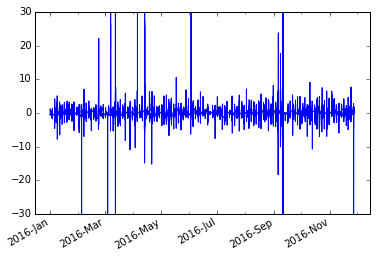

In [8]:
plot_cxctime(dat.times, dat.mins * R2A)
plot_cxctime(dat.times, dat.maxes * R2A)
plt.ylim(-30, 30)
plt.margins(0.05)

In [77]:
maxes = np.maximum(dat.maxes, -dat.mins)

In [79]:
bad = maxes * R2A > 10
DateTime(dat.times[bad]).date

array(['2016:035:16:04:15.816', '2016:054:08:14:47.816',
       '2016:064:01:13:03.816', '2016:067:04:17:35.816',
       '2016:067:04:23:03.816', '2016:067:04:28:31.816',
       '2016:067:04:33:59.816', '2016:067:04:39:27.816',
       '2016:067:04:44:55.816', '2016:067:04:50:23.816',
       '2016:067:04:55:51.816', '2016:067:05:01:19.816',
       '2016:067:05:06:47.816', '2016:067:05:12:15.816',
       '2016:067:05:17:43.816', '2016:067:05:23:11.816',
       '2016:067:05:28:39.816', '2016:067:05:34:07.816',
       '2016:067:05:39:35.816', '2016:067:05:45:03.816',
       '2016:067:05:50:31.816', '2016:067:05:55:59.816',
       '2016:067:06:01:27.816', '2016:067:06:06:55.816',
       '2016:067:06:12:23.816', '2016:067:06:17:51.816',
       '2016:067:06:23:19.816', '2016:067:06:28:47.816',
       '2016:067:06:34:15.816', '2016:067:06:39:43.816',
       '2016:067:06:45:11.816', '2016:067:06:50:39.816',
       '2016:067:06:56:07.816', '2016:067:07:01:35.816',
       '2016:067:07:07:03.816',

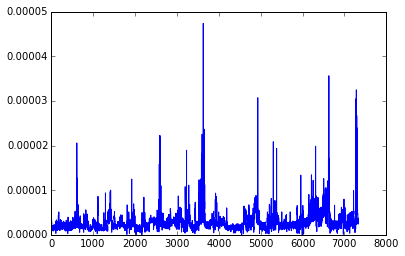

In [29]:
plot(maxes)

In [22]:
def plot_meas_resid(start, stop, slot=7):
    dat = fetch.Msid("AORESY{}".format(slot), start, stop)
    dat.vals *= R2A
    dat.vals = np.abs(dat.vals).clip(-100, 100)
    plt.hist(dat.vals, bins=np.arange(0, 101, 0.5), log=True)
    plt.grid()
    plt.xlabel('Star measurement residual (arcsec)')
    plt.title('Slot {} {} - {}'.format(slot, start, stop));

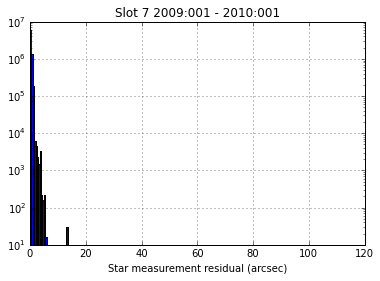

In [23]:
plot_meas_resid('2009:001', '2010:001', slot=7)

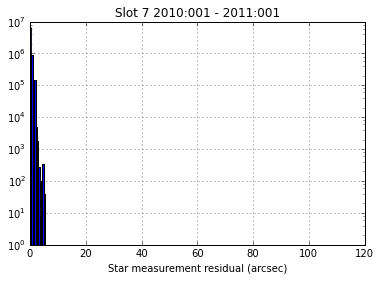

In [24]:
plot_meas_resid('2010:001', '2011:001', slot=7)

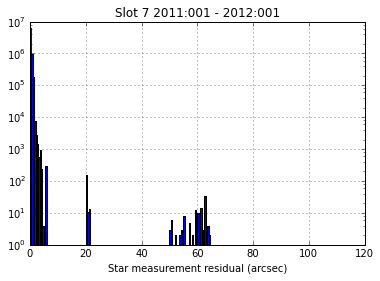

In [25]:
plot_meas_resid('2011:001', '2012:001', slot=7)

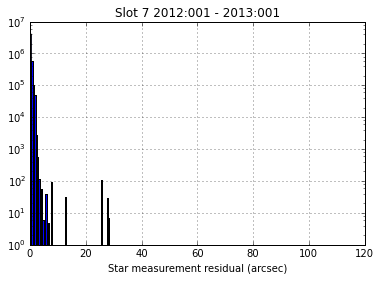

In [26]:
plot_meas_resid('2012:001', '2013:001', slot=7)

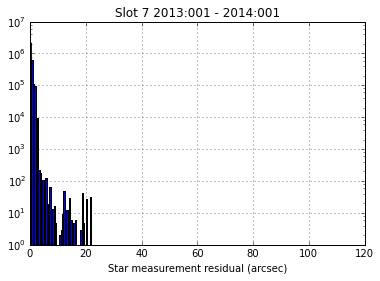

In [27]:
plot_meas_resid('2013:001', '2014:001', slot=7)

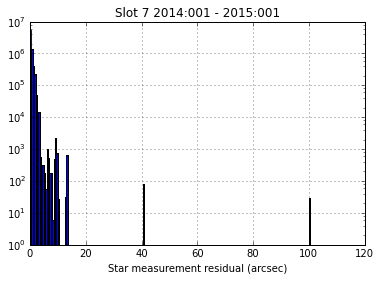

In [28]:
plot_meas_resid('2014:001', '2015:001', slot=7)

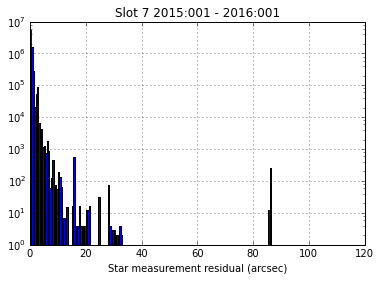

In [29]:
plot_meas_resid('2015:001', '2016:001', slot=7)

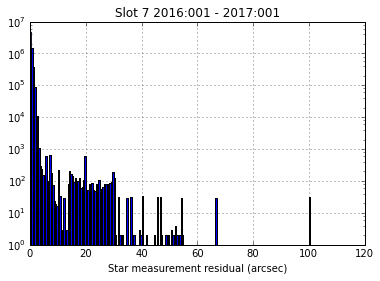

In [30]:
plot_meas_resid('2016:001', '2017:001', slot=7)

In [102]:
ints = logical_intervals(dat.times, dat.vals > 5)

In [106]:
ok = ints['duration'] > 10
ints[ok]

datestart,datestop,duration,tstart,tstop
string168,string168,float64,float64,float64
2016:009:01:47:44.783,2016:009:01:48:01.183,16.400001049,568691332.967,568691349.367
2016:009:05:22:02.384,2016:009:05:29:04.684,422.300024033,568704190.568,568704612.868
2016:035:16:02:25.913,2016:035:16:04:33.013,127.100007176,570989014.097,570989141.197
2016:054:08:13:14.405,2016:054:08:15:58.405,164.000009418,572602462.589,572602626.589
2016:067:04:15:39.854,2016:067:08:02:35.955,13616.100777,573711408.038,573725024.139
2016:072:11:57:15.980,2016:072:11:57:32.380,16.4000009298,574171104.164,574171120.564
2016:072:11:57:36.480,2016:072:11:59:47.680,131.200007558,574171124.664,574171255.864
2016:072:12:27:36.380,2016:072:12:28:13.280,36.9000022411,574172924.564,574172961.464
2016:083:07:25:10.334,2016:083:07:28:14.834,184.50001061,575105178.518,575105363.018


In [101]:
len(dat)

6526761

In [44]:
dwell = events.dwells.filter(obsid=51210)[0]

In [48]:
d = fetch.Msid('aoresy7', dwell.start, dwell.stop)
dz = fetch.Msid('aoresz7', dwell.start, dwell.stop)

In [49]:
d.vals *= R2A
dz.vals *= R2A

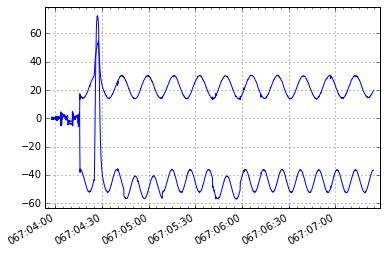

In [50]:
d.plot()
dz.plot()
plt.grid();

In [81]:
events.obsids.filter('2016:067:07:07:03.816', '2016:067:07:07:04.816')

<Obsid: start=2016:067:03:10:21.279 dur=15246 obsid=51210>

In [38]:
tccd = fetch_sci.Msid('aacccdpt', '2008:001', '2017:001', stat='daily')
tccd.remove_intervals(events.safe_suns(pad=2e5) | events.normal_suns(pad=2e5))

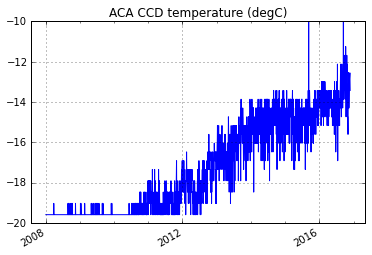

In [43]:
plot_cxctime(tccd.times, tccd.maxes)
plt.ylim(-20, -10)
plt.grid()
plt.margins(0.05)
plt.title('ACA CCD temperature (degC)');